In [5]:
import pandas as pd
import re
row_path = r"D:\new622_sfsk\corpus\new_622_data\score\test\test_top1.csv"
pre_path = r"D:\new622_sfsk\score_test\main_article_att_correct\row_submit.txt"

# 2.txt文件
new_dev_pre =  pd.read_csv(pre_path, sep='\t', names=['id', 'pre_label'])
row_dev =  pd.read_csv(row_path)

idx =[i for i in row_dev['id']]
answer =[i for i in row_dev['answer']]

ans = []

for a in answer:
    ans.append(''.join(re.findall(r'[A-Za-z]', a)))

pre =[i for i in new_dev_pre['pre_label']]
kdca =[i for i in row_dev['kdca']]
final_data_dict = {'id': idx, 'answer': ans, 'pred': pre, 'kdca':kdca}
final_data = pd.DataFrame(final_data_dict)

final_data[:2036]

,id,answer,pred,kdca
0,3_8586,ABC,BCD,1
1,3_6746,AC,ABCD,0
2,1_5849,A,C,0
3,3_9560,AC,CD,1
4,1_1400,ACD,ABCD,0
...,...,...,...,...
2031,1_1256,ABC,ABCD,0
2032,1_4928,A,D,0
2033,1_4662,AC,CD,0
2034,4_816,D,NaN,1


全部数据
真实标签数据情况: 
各个选项数据
{'D': 302, 'C': 275, 'B': 271, 'A': 215, 'ABCD': 150, 'ABC': 116, 'ABD': 111, 'AC': 92, 'BCD': 87, 'BC': 79, 'AB': 78, 'ACD': 73, 'AD': 70, 'BD': 59, 'CD': 58}，
单选数量1063，
多选数量973


---------------
预测标签数据情况: 
各个选项数据
{'ABCD': 291, 'B': 146, 'D': 139, 'C': 131, 'A': 131, 'ABC': 108, 'ABD': 104, 'ACD': 103, 'BCD': 96, 'AD': 92, 'AC': 89, 'CD': 85, 'AB': 79, 'BC': 75, 'BD': 63}，
单选数量547，
多选数量1185


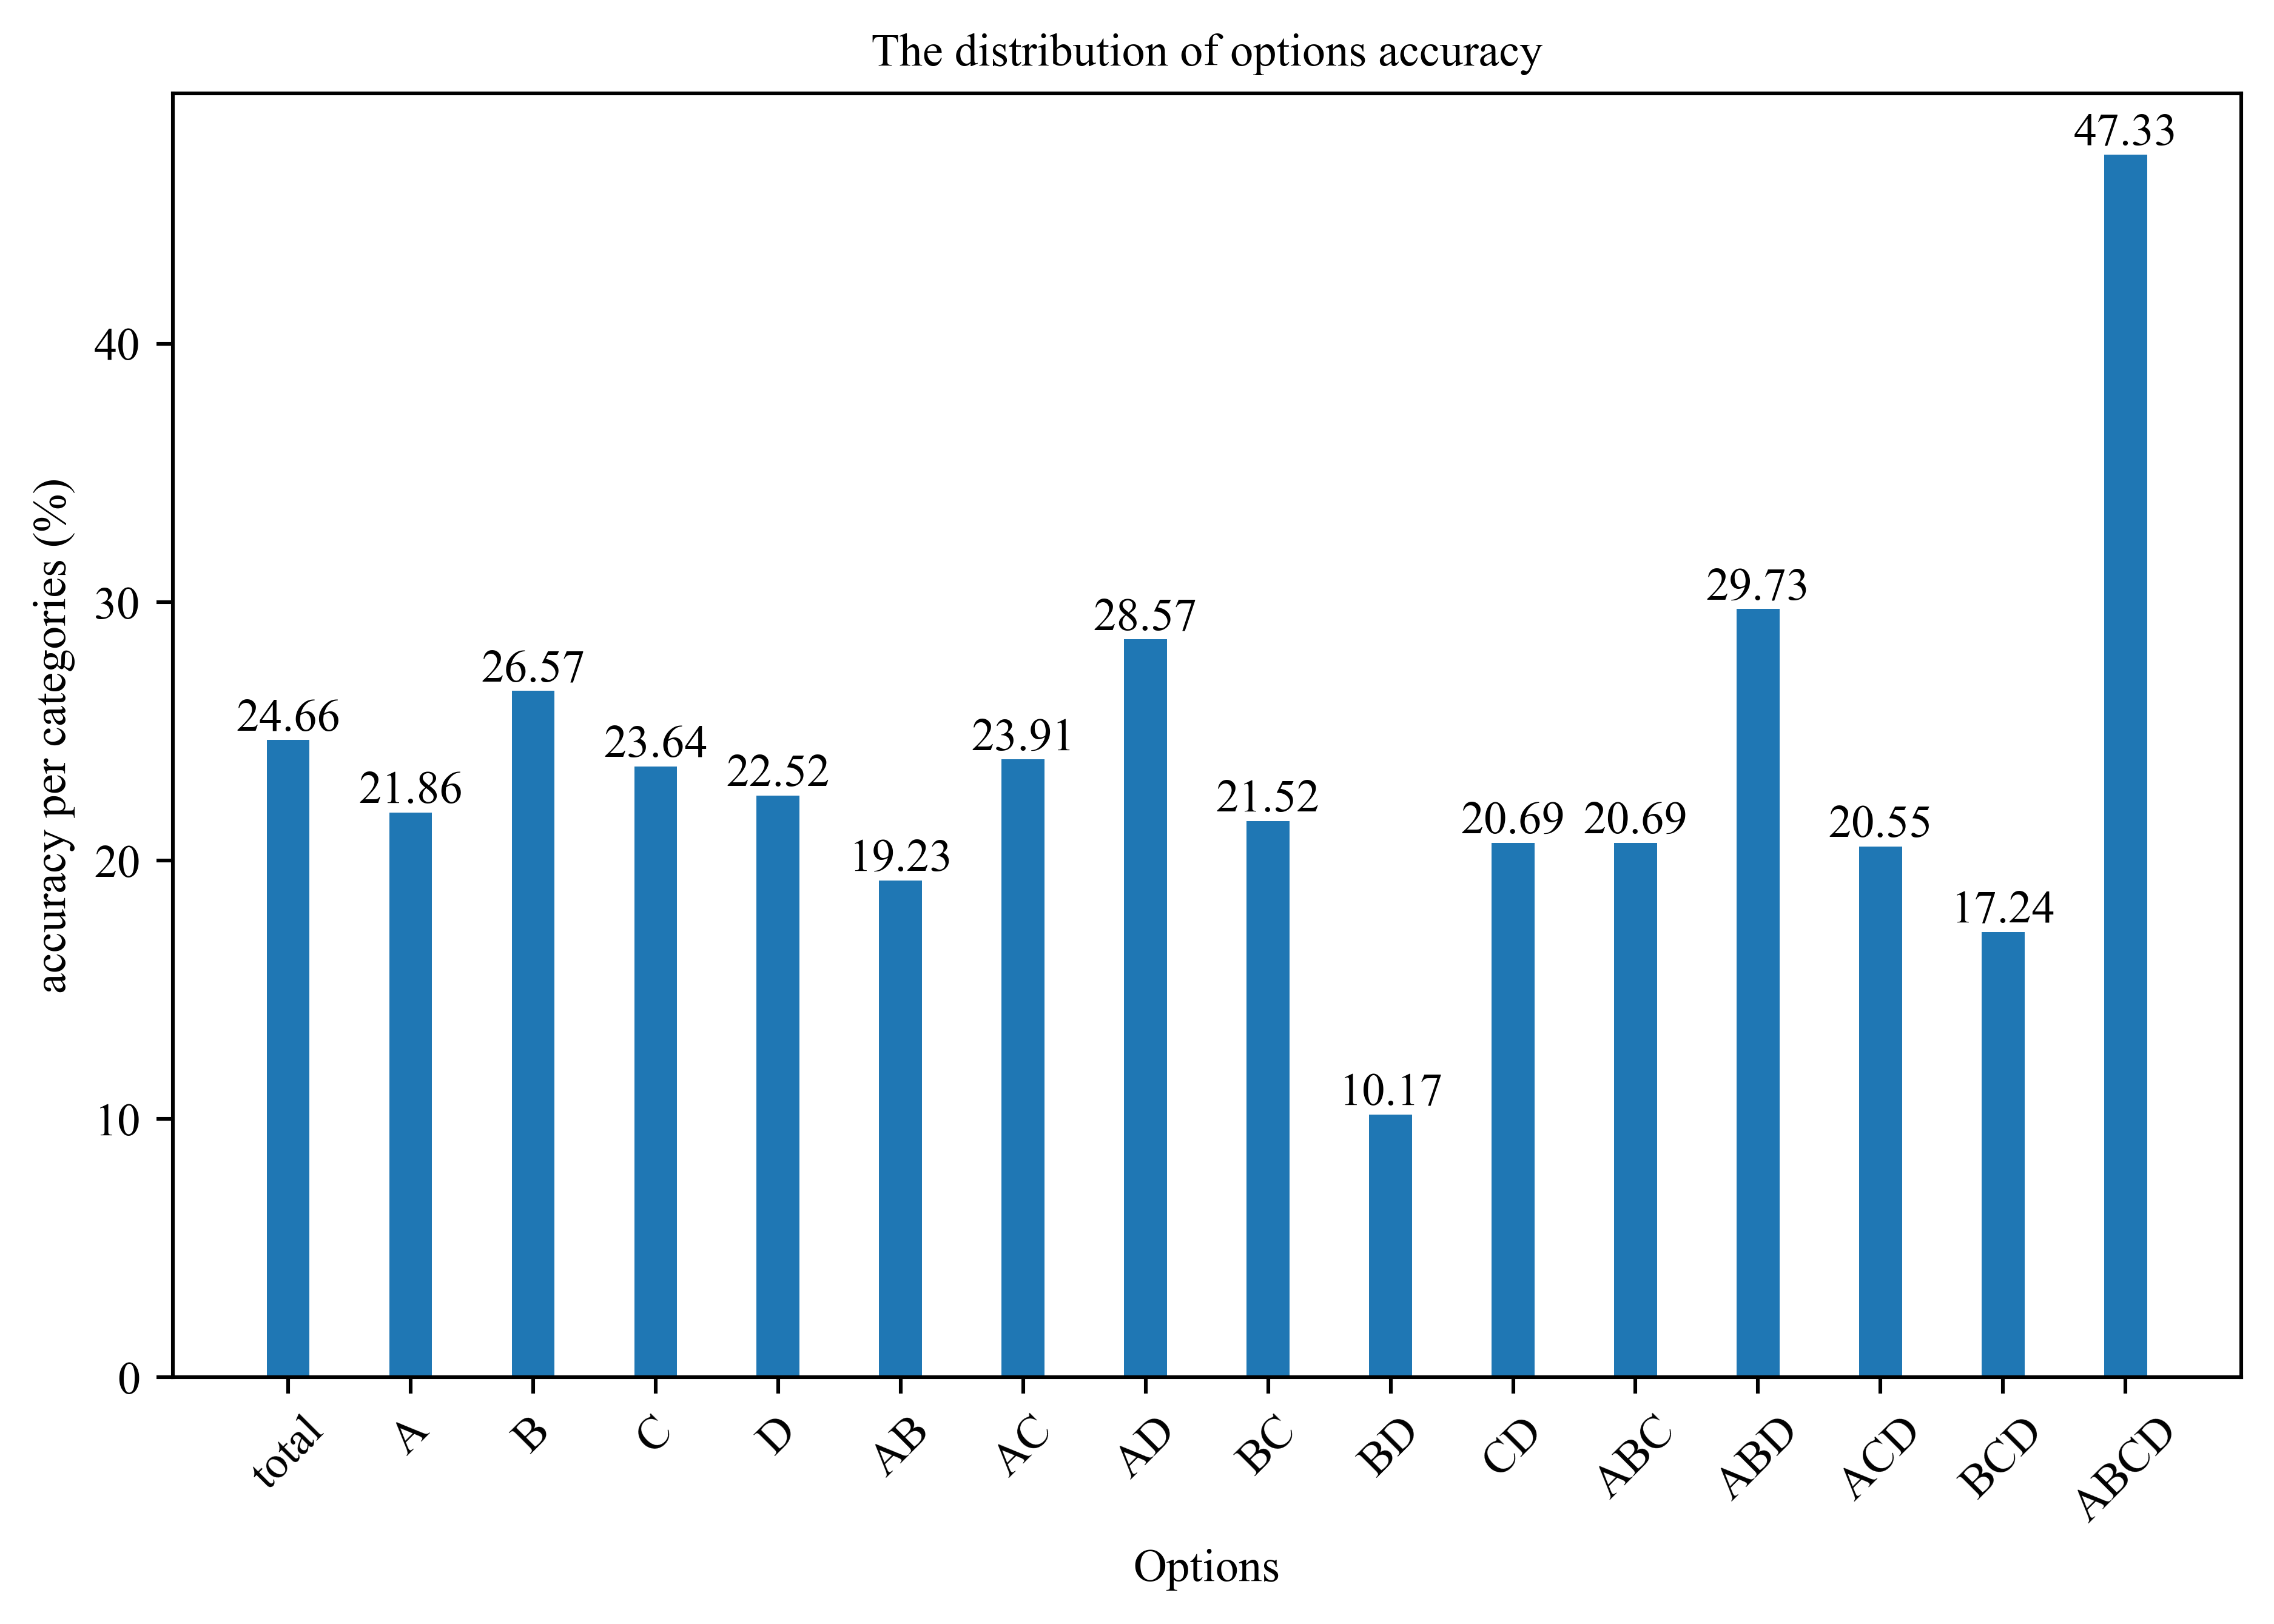


整体准确率： 24.66

单选准确率： 23.71

多选准确率： 25.69


In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt 

def show(x, y):
    font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 10,
    }
    figure = plt.figure(figsize=(8,5),dpi=550, )

    plt.rcParams['font.sans-serif'] = 'Times New Roman'

    # x = [i for i in data['answer'].value_counts().keys()]
    # x = ['C', 'D', 'B', 'A', 'ABCD', 'ABC', 'ABD', 'ACD', 'BCD', 'BC', 'AB', 'AC', 'AD', 'BD', 'CD']



    # y = [i for i in data['answer'].value_counts()]
    p1 = plt.bar(x, y, width= 0.35)  # width表示柱子的宽度

    plt.bar_label(p1, label_type='edge')   # label_type=‘edge’表示将数据值标签放在柱子顶端，label_type=‘center’表示将数据值标签放在柱子中间。


    plt.title('The distribution of options accuracy',font)
    plt.ylabel('accuracy per categories (%)',font)
    plt.xlabel('Options', fontdict=font)
    plt.xticks(rotation=45) 
    plt.show()
#     plt.savefig(r"C:\Users\cgb43\Desktop\option_acc.pdf",dpi=600,format='eps')
    # plt.xticks(fontsize=5) # x的大小


def analysis(final_data, score_data=None, fig=False):

    # 标签数据的情况
    true_sum = {}
    for key, value in zip(final_data['answer'].value_counts().keys(), final_data['answer'].value_counts()):
        true_sum.update({key: value})
    sigle_sum = sum([true_sum['A'],true_sum['B'],true_sum['C'],true_sum['D']])
    all_sum = sum([true_sum['AB'],true_sum['AC'], true_sum['AD'], true_sum['BC'], true_sum['BD'], true_sum['CD'],
                   true_sum['ABC'], true_sum['ABD'], true_sum['ACD'], true_sum['BCD'], true_sum['ABCD']])
    print("真实标签数据情况: \n各个选项数据\n{0}，\n单选数量{1}，\n多选数量{2}\n\n\n---------------".format(true_sum,sigle_sum, all_sum))


    # 预测标签数据情况:
    pre_sum = {}
    for key, value in zip(final_data['pred'].value_counts().keys(), final_data['pred'].value_counts()):
        pre_sum.update({key: value})
    sigle_presum = sum([pre_sum['A'],pre_sum['B'],pre_sum['C'],pre_sum['D']])
    all_presum = sum([pre_sum['AB'],pre_sum['AC'], pre_sum['AD'], pre_sum['BC'], pre_sum['BD'], pre_sum['CD'],
                   pre_sum['ABC'], pre_sum['ABD'], pre_sum['ACD'], pre_sum['BCD'], pre_sum['ABCD']])
    print("预测标签数据情况: \n各个选项数据\n{0}，\n单选数量{1}，\n多选数量{2}".format(pre_sum,sigle_presum, all_presum))
    # pre_sum,sigle_presum,all_presum

    ans_true_a = []
    correct = 0

    correct_a = 0
    correct_b = 0
    correct_c = 0
    correct_d = 0
    correct_ab = 0
    correct_ac = 0
    correct_ad = 0
    correct_bc = 0
    correct_bd = 0
    correct_cd = 0
    correct_abc = 0
    correct_abd = 0
    correct_acd = 0
    correct_bcd = 0
    correct_abcd = 0

    total = len(final_data['answer'])


    for (t,p) in zip(final_data['answer'], final_data['pred']):
        if t == p:
            correct = correct+1
            if p == 'A':
                correct_a += 1
            if p == 'B':
                correct_b += 1
            if p == 'C':
                correct_c += 1
            if p == 'D':
                correct_d += 1
            if p == 'AB':
                correct_ab += 1
            if p == 'AC':
                correct_ac += 1
            if p == 'AD':
                correct_ad += 1
            if p == 'BC':
                correct_bc += 1
            if p == 'BD':
                correct_bd += 1
            if p == 'CD':
                correct_cd += 1
            if p == 'ABC':
                correct_abc += 1
            if p == 'ABD':
                correct_abd += 1
            if p == 'ACD':
                correct_acd += 1
            if p == 'BCD':
                correct_bcd +=1
            if p == 'ABCD':
                correct_abcd += 1
    total_acc = round((correct/total) * 100, 2)
    a_acc = round((correct_a / true_sum['A']) * 100, 2)
    b_acc = round((correct_b / true_sum['B'])* 100, 2)
    c_acc = round((correct_c / true_sum['C']) * 100, 2)
    d_acc = round((correct_d / true_sum['D']) * 100, 2)
    ab_acc = round((correct_ab / true_sum['AB']) * 100, 2)
    ac_acc = round((correct_ac / true_sum['AC']) * 100, 2)
    ad_acc = round((correct_ad / true_sum['AD']) * 100, 2)
    bc_acc = round((correct_bc / true_sum['BC']) * 100, 2)
    bd_acc = round((correct_bd / true_sum['BD']) * 100, 2)
    cd_acc = round((correct_cd / true_sum['CD']) * 100, 2)
    abc_acc = round((correct_abc / true_sum['ABC']) * 100, 2)
    abd_acc = round((correct_abd / true_sum['ABD']) * 100, 2)
    acd_acc = round((correct_acd / true_sum['ACD']) * 100, 2)
    bcd_acc = round((correct_bcd / true_sum['BCD']) * 100, 2)
    abcd_acc = round((correct_abcd / true_sum['ABCD']) * 100, 2)

    y = [total_acc, a_acc, b_acc, c_acc,d_acc,
         ab_acc,ac_acc,ad_acc,bc_acc,bd_acc,cd_acc,
         abc_acc,abd_acc,acd_acc,bcd_acc,abcd_acc]
    x = ['total', 'A', 'B', 'C', 'D', 'AB', 'AC', 'AD', 'BC', 'BD', 'CD', 'ABC', 'ABD', 'ACD', 'BCD', 'ABCD']
    y2 = []
    

    single_acc = sum([correct_a, correct_b, correct_c, correct_d])/sigle_sum
    multi_acc = sum([correct_ab, correct_ac, correct_ad, correct_bc, correct_bd, correct_cd,
         correct_abc, correct_abd, correct_acd, correct_bcd, correct_abcd])/all_sum
    if fig:
        show(x,y)
    
    print("\n整体准确率：",total_acc)
    print("\n单选准确率：", round(single_acc * 100, 2))
    print("\n多选准确率：", round(multi_acc * 100, 2))
print("全部数据")
analysis(final_data[:2036], fig=True)

In [7]:
import pandas as pd
ex = pd.read_excel(io=r"D:\Desktop\chat_result\chatgpt0-2036 - 副本.xlsx")
ex

,id,query,true_label,true_or_false,kdca
0,3_8586,请直接给出下列问题的正确答案：范某因涉嫌故意伤害罪被公安机关决定对其监视居住，范某在监视居住...,ABC,0,1
1,3_6746,请直接给出下列问题的正确答案：根据民事诉讼法和有关司法解释，当事人可以约定下列哪些事项? A...,AC,0,0
2,1_5849,请直接给出下列问题的正确答案：根据《刑事诉讼法》的规定，在下列各案中，属于可以加重被告人的刑...,A,0,0
3,3_9560,请直接给出下列问题的正确答案：某法院开庭审理一起民事案件，参加旁听的原告之夫李某认为证人王某...,AC,0,1
4,1_1400,请直接给出下列问题的正确答案：关于国际货物买卖合同中买方收货的义务，根据1980年《联合国国...,ACD,0,0
...,...,...,...,...,...
4066,3_3002,请直接给出下列问题的正确答案：根据我国现行宪法和立法法的规定，下列选项中哪一行为构成违宪? ...,A,0,1
4067,3_5500,请直接给出下列问题的正确答案：下列行为不属于滥用行政权力的有: A.某地地方税务局为扶持少数...,AD,0,1
4068,2_636,请直接给出下列问题的正确答案：清末颁行的商事法律包括: A.钦定大清商律 B.破产律 C.公...,ABCD,0,0
4069,1_1247,请直接给出下列问题的正确答案：关于宪法解释与宪法监督，以下说法正确的是: A.为保障宪法的最...,B,0,0


真实标签数据情况: 
各个选项数据
{'D': 302, 'C': 275, 'B': 271, 'A': 215, 'ABCD': 150, 'ABC': 116, 'ABD': 111, 'AC': 92, 'BCD': 87, 'BC': 79, 'AB': 78, 'ACD': 73, 'AD': 70, 'BD': 59, 'CD': 58}，
单选数量1063，
多选数量973


---------------
预测标签数据情况: 
各个选项数据
{'0': 1573, 'B': 120, 'C': 104, 'D': 91, 'A': 74, 'ABCD': 18, 'ABC': 9, 'BCD': 9, 'BD': 8, 'ABD': 7, 'AB': 6, 'BC': 5, 'AC': 4, 'CD': 4, 'ACD': 3, 'AD': 1}，
单选数量389，
多选数量74


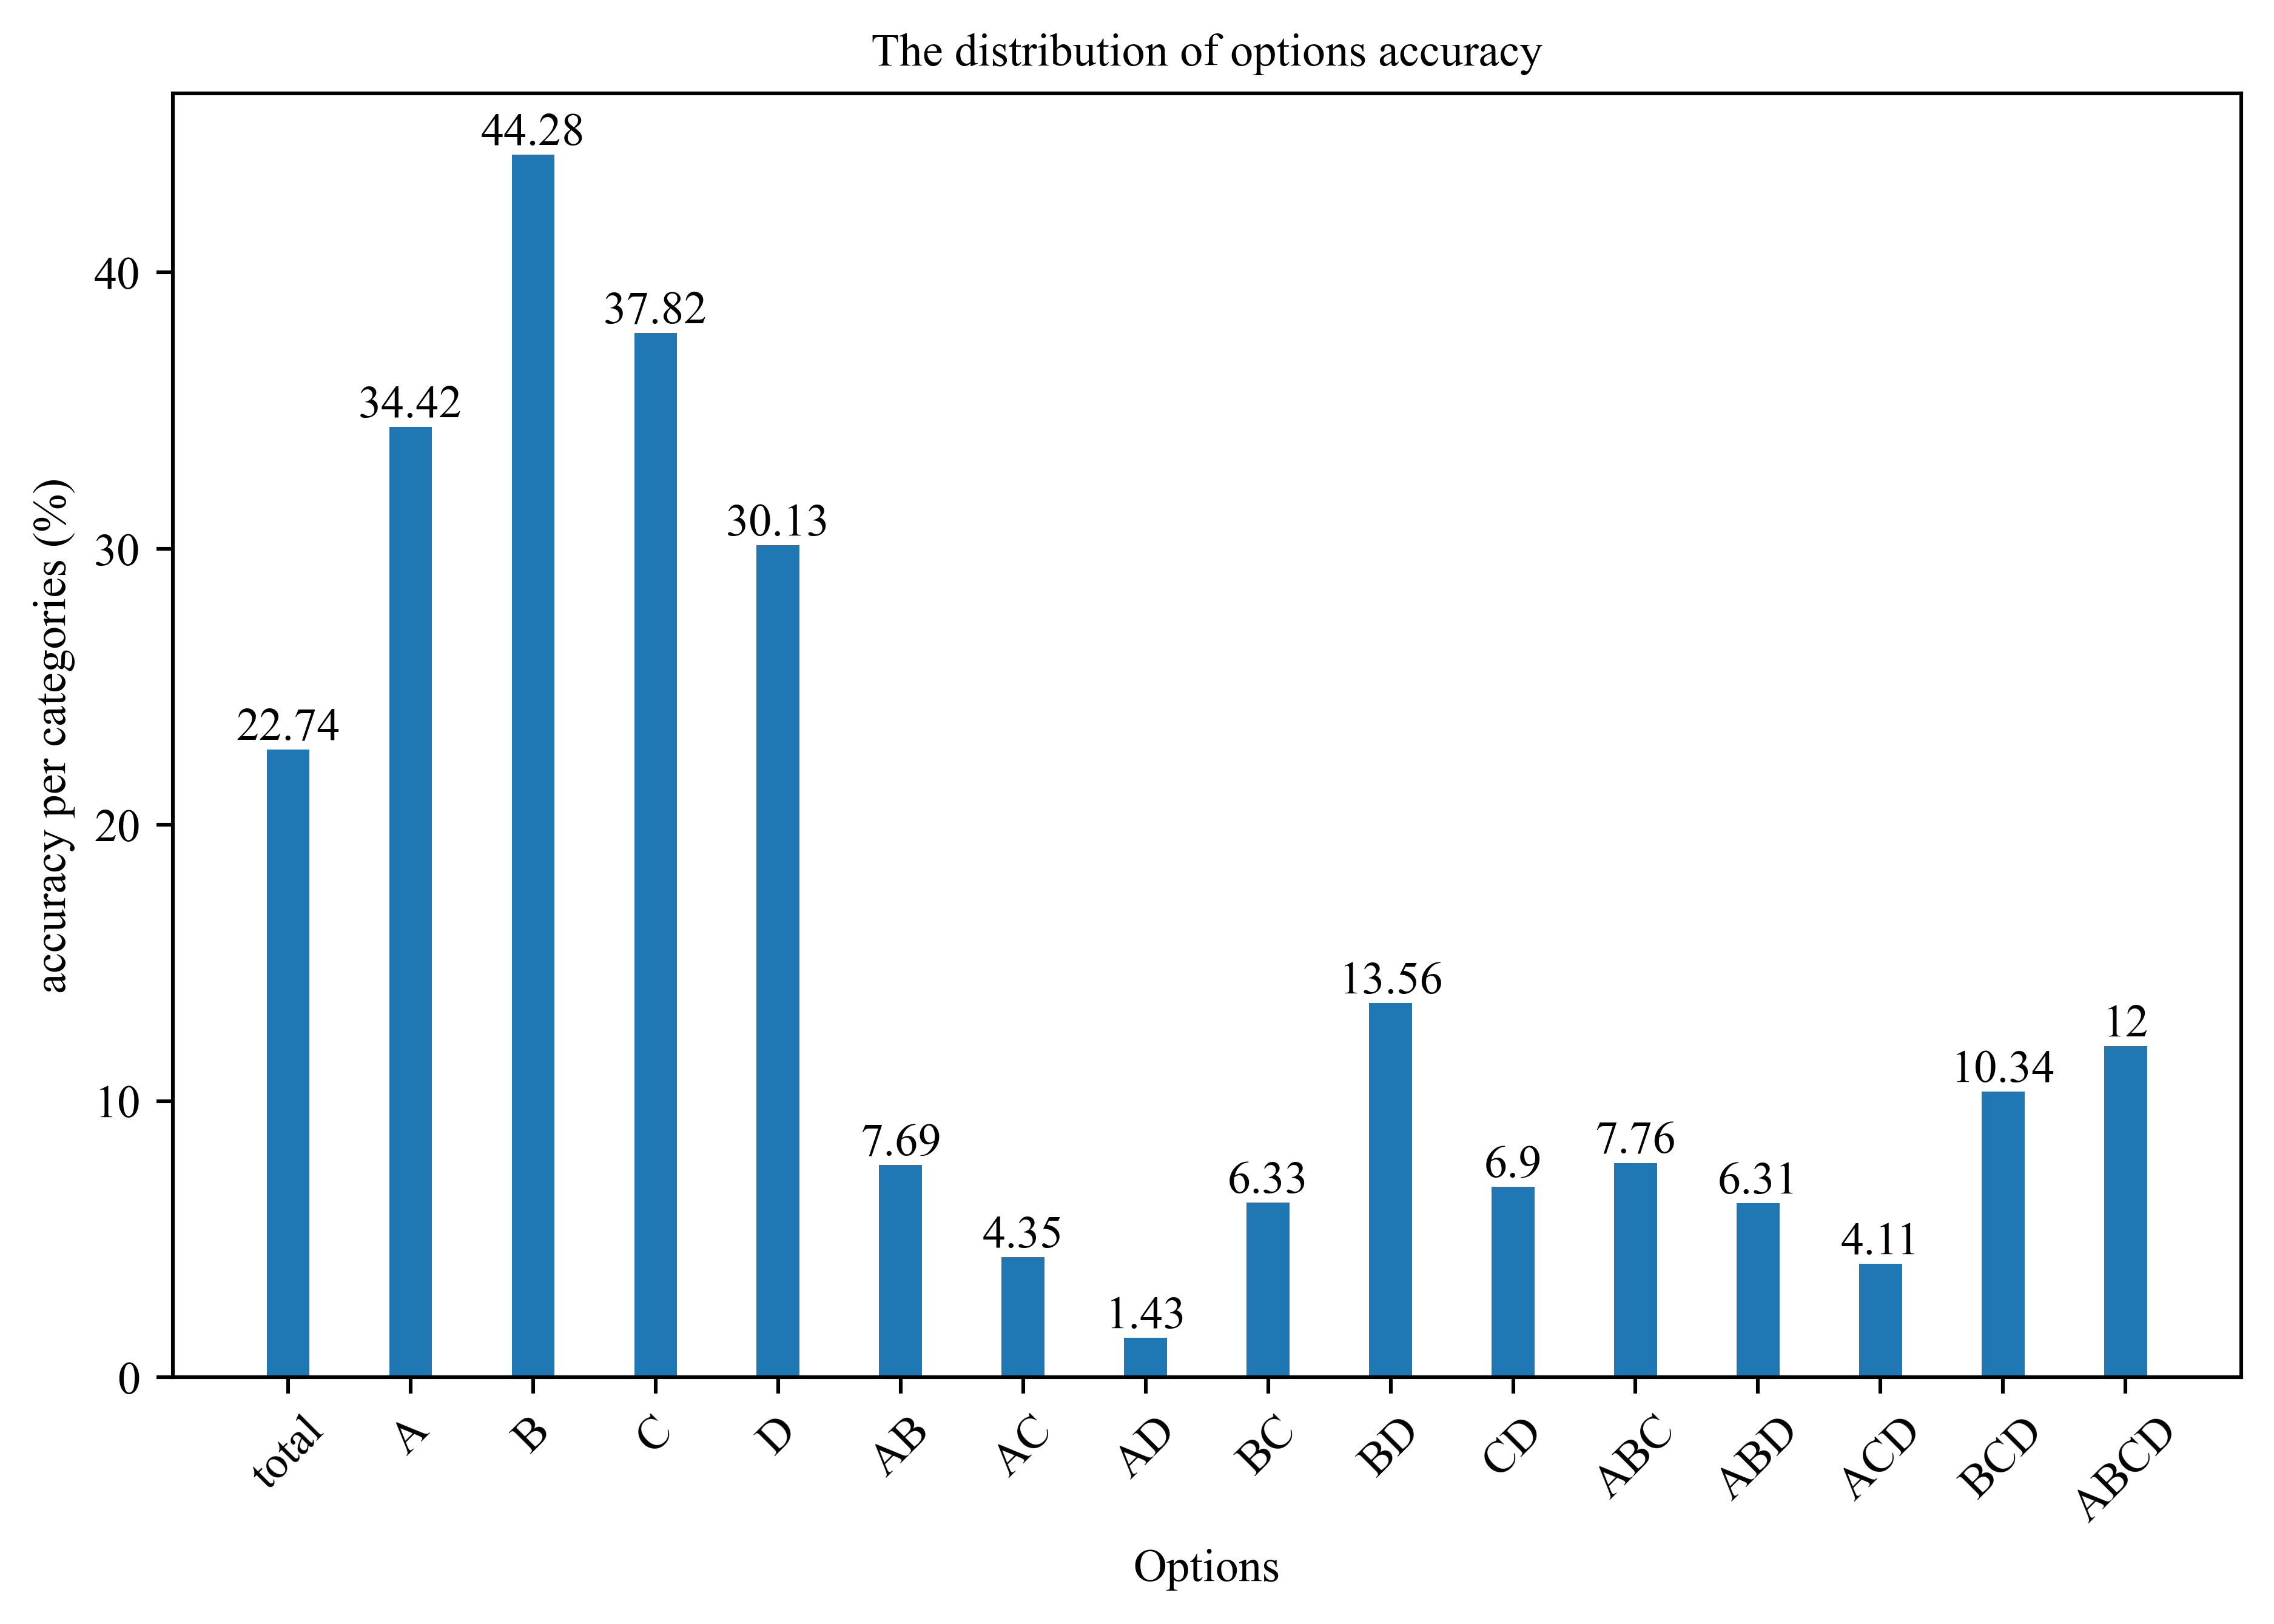


整体准确率： 22.74

单选准确率： 36.59

多选准确率： 7.61


In [10]:
dataex=ex[:2036]
dataex1 = dataex.rename(columns={'true_label': 'answer'})

pre_an = []
for i,j in zip(dataex1['answer'], dataex1['true_or_false']):
#     print(i,j)
    if j == 1:
        pre_an.append(i)
    else:
        pre_an.append('0')
dataex1['pred']=pre_an
analysis(dataex1[:2036], fig=True)

In [12]:
# print("\n\n\n\n*********知识驱动数据kd*********")
# final_data=dataex1
# kd = final_data[final_data['kdca'] == 0]
# analysis(kd)

print("\n\n\n\n*********案例分析数据*********")
ca = final_data[final_data['kdca'] == 1]
analysis(ca)





*********案例分析数据*********
真实标签数据情况: 
各个选项数据
{'D': 201, 'C': 189, 'B': 176, 'A': 144, 'ABCD': 82, 'ABC': 70, 'ABD': 66, 'AC': 64, 'BC': 60, 'BCD': 48, 'ACD': 47, 'AD': 43, 'BD': 40, 'AB': 37, 'CD': 36}，
单选数量710，
多选数量593


---------------


KeyError: 'AB'